In [ ]:
import math
import time
import random
from typing import *
from statistics import mean
import matplotlib.pyplot as plt

def plant_model(steering_angle:float, yaw:float, rps:float, x:float, y:float, L=0.365) -> Tuple[float, float, float, float, float]:
  """

  Args: 
    Steering Angle in degrees, 
    Theta (yaw w.r.t X-Y Plane) in degrees, 
    Rotations Per Second to calculate current velocity
    (X,Y) current X and Y co-ordinates of the Car

  Returns: 
    Velocity of the car
    Theta is the yaw similar to the input Theta but calculated on the inputs of RPS and Heading Angle and feeding back to the function again
    Omega is the angular velocity of the vehicle derived using Slipping and Heading Angle
    (X,Y) current X and Y co-ordinates of the Car
    dt is the time taken for function to execute

  Notes:
    Theta and Omega obtained are again given as a feedback to calculate X_Dot, Y_Dot, Theta
    Currently Theta is calculated using incremental method by adding the product of Omega and Execution time of the Function

  """
  start_time = time.time()
  if steering_angle>25:
    steering_angle=25
  elif steering_angle<-25:
    steering_angle=-25
  if rps>25:
    rps=25
  elif rps<-10:
    rps=-10
  vel = math.pi*2*rps*0.031
  steering_angle = -steering_angle*math.pi/180
  yaw = yaw*math.pi/180
  Omega = vel*math.tan(steering_angle)/L    
  x_dot = vel*math.cos(yaw)
  y_dot = vel*math.sin(yaw)
  dt = time.time() - start_time
  yaw = yaw + Omega*dt
  x = x + x_dot*dt
  y = y + y_dot*dt
  vel = math.sqrt(x_dot**2 + y_dot**2)
  yaw = yaw*180/math.pi
  yaw -= math.ceil(yaw / 360 - 0.5) * 360
  return vel, yaw, x, y, dt

-121.93098709773635
3.8955748904513436
1.290429898199191e-06


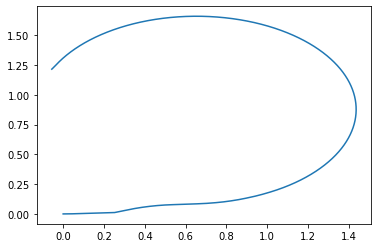

In [ ]:
start_time = time.time()
seconds = 4
phi = 0
yaw = 0
rps = 20
x = 0
y = 0
x_list = []
y_list = []
dt_list = []
while True:
    phi = phi+random.randint(-8,8)
    current_time = time.time()
    elapsed_time = current_time - start_time
    vel, yaw, x, y, dt = plant_model(phi, yaw, rps, x, y)
    dt_list.append(dt)
    x_list.append(x)
    y_list.append(y)
    if elapsed_time > seconds:
        break

plt.plot(x_list,y_list)
print(yaw)
print(vel)
print(mean(dt_list))